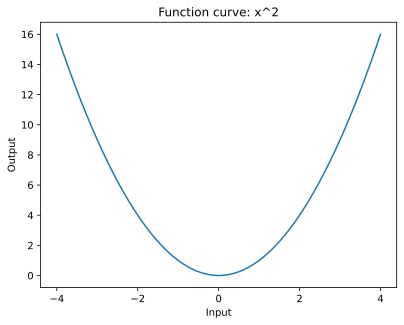

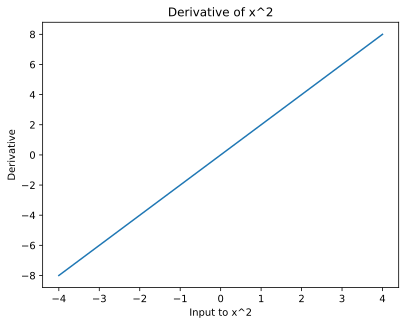

In [58]:
### DERIVATIVES ###
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

def f(x):
    return x**2

x = np.linspace(-4,4,2001)
y = f(x)

# set tick interval:
loc = plt.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(loc)
# plot function
plt.plot(x,y)
plt.title('Function curve: x^2')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

## Calculate derivate and plot:
# nax^n-1: for x^2 the derivative is 2x
def derivative(power, coefficent, x):
    exp = power - 1
    return power * coefficent * (x**exp)

# Note how the slope/derivative is negative below zero, flat at zero, and positive derivative if input x is above zero
plt.title('Derivative of x^2')
plt.plot(x,derivative(power=2,coefficent=1,x=x))
plt.xlabel('Input to x^2')
plt.ylabel('Derivative')
plt.show()

f(x): 2*x**2
derivative: 4*x


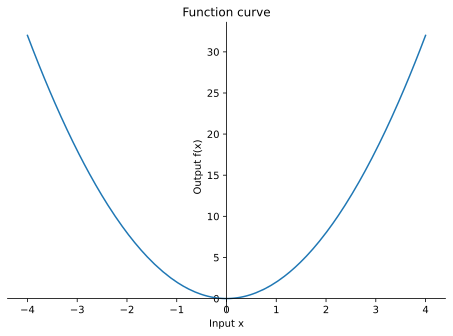

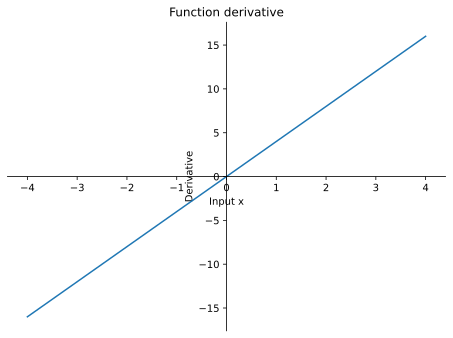

In [67]:
# Using sympy package ("Symbolic Math")
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym
import sympy.plotting.plot as symplot

x = sym.symbols('x') # create symbolic variable which allows for computing derivatives

# create a function
fx = 2*x**2 # derivative is 4x

# use .diff to get the discrete derivative
df = sym.diff(fx,x)

print(f'f(x): {fx}')
print(f'derivative: {df}')

# plot with sympy
symplot(fx,(x,-4,4),title="Function curve",xlabel="Input x", ylabel="Output f(x)")
plt.show()

symplot(df,(x,-4,4),title="Function derivative",xlabel="Input x",ylabel="Derivative")
plt.show()




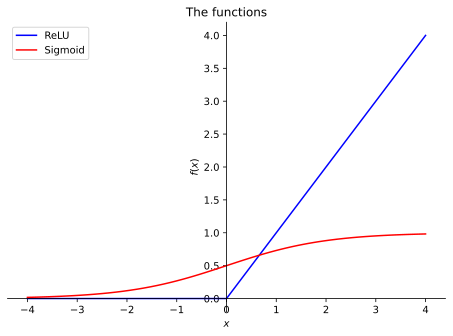

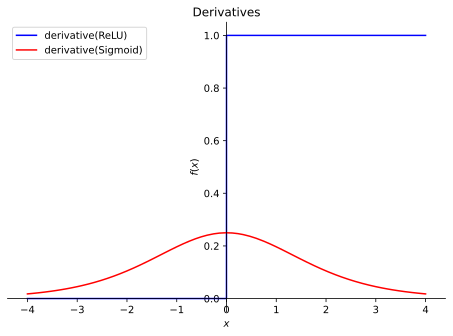

In [72]:
## Show derivates for the ReLU and Sigmoid functions

# all negatives are converted to 0 (first arg max), otherwise x is left alone
relu = sym.Max(0,x)
# formula for sigmoid - 1 divided by e to the -x, this formula gives us a S curve shape
sigmoid = 1 / (1+sym.exp(-x))

# plot relu and sigmoid function on the same graph:
p = symplot(relu,(x,-4,4),label="ReLU",show=False,line_color='blue')
p.extend(symplot(sigmoid,(x,-4,4),label="Sigmoid",show=False,line_color='red'))
p.legend = True
p.title = "The functions"
p.show()

# Plot their derivatives
p = symplot(sym.diff(relu),(x,-4,4),label="derivative(ReLU)",show=False,line_color='blue')
p.extend(symplot(sym.diff(sigmoid),(x,-4,4),label="derivative(Sigmoid)",show=False,line_color='red'))
p.legend = True
p.title = "Derivatives"
p.show()



In [79]:
#### Product and Chain rules

# This makes Jupyter notebook display look nicer and print functions with nice latek printing etc.
from IPython.display import display

# initialize a symbolic variable to work with
x = sym.symbols('x')

# create two different functions that will interact
fx = 2*x**2
gx = 4*x**3 - 3*x**4

# compute their derivatives separately
df = sym.diff(fx)
dg = sym.diff(gx)

# Manually apply the product rule (f' * g + f * g'):
manual = df*gx + fx*dg
# Using sympy:
viasympy = sym.diff(fx*gx)

print('Functions:')
display(fx)
display(gx)
print('Derivatives:')
display(df)
display(dg)
print('Manually calculated product:')
display(manual)
print('Calculated using sympy:')
display(viasympy)


### Chain Rule (dealing with embedded functions and calculating the derivative)

gx = x**2 + 4*x**3
fx = (gx)**5 # f(g(x))

print('Chain Rule function: ')
display(fx)

print('Derivative:')
display(sym.diff(fx))


Functions:


2*x**2

-3*x**4 + 4*x**3

Derivatives:


4*x

-12*x**3 + 12*x**2

Manually calculated product:


2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)

Calculated using sympy:


2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)

Chain Rule function: 


(4*x**3 + x**2)**5

Derivative:


(60*x**2 + 10*x)*(4*x**3 + x**2)**4